In [1]:
# import libraries
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# get stock data
#import pandas_datareader as pdr
#df = pdr.DataReader('AAPL', data_source='yahoo', start='2017-01-01', end='2019-12-31')
#df

In [3]:
# get stock data
df = pd.read_csv('C:/Users/joeba/OneDrive/Documents/ML/finance/Book2.csv')
df

,Date,Stock1,Stock2,Stock3,Stock4,Stock5,Stock6
0,01/01/2019,177.0,17,22.0,178.0,178.0,632.0
1,02/01/2019,84.0,13,14.0,365.0,365.0,859.0
2,03/01/2019,104.0,20,34.0,6117.0,6117.0,840.0
3,04/01/2019,91.0,25,17.0,1451.0,1451.0,787.0
4,05/01/2019,130.0,7,25.0,1359.0,1359.0,611.0
...,...,...,...,...,...,...,...
86,28/03/2019,281.0,47,30.0,3348.0,3348.0,646.0
87,29/03/2019,283.0,42,25.0,4958.0,4958.0,607.0
88,30/03/2019,484.0,8,16.0,8049.0,1.0,520.0
89,31/03/2019,329.0,11,8.0,7464.0,7464.0,202.0


In [4]:
# get the number of rows and columns in the df
df.shape

(91, 7)

In [5]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

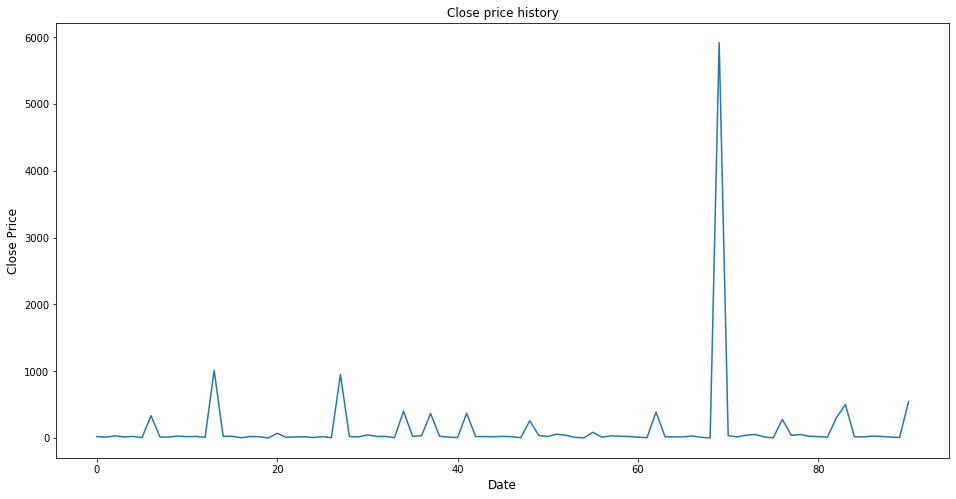

In [23]:
# visualise the price history
plt.figure(figsize=(16,8))
plt.title('Close price history')
#plt.plot(df['Close'])
#plt.plot(df['Stock1'])
#plt.plot(df['Stock2'])
plt.plot(df['Stock3'])
#plt.plot(df['Stock4'])
#plt.plot(df['Stock5'])
#plt.plot(df['Stock6'])
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.show()

In [38]:
# get the close price as a 2d numpy array - using filter rather than just extracting the column
#data=df.filter(['Close']).values
data=df.filter(['Stock3']).values
data

array([[2.20000000e+01],
       [1.40000000e+01],
       [3.40000000e+01],
       [1.70000000e+01],
       [2.50000000e+01],
       [7.00000000e+00],
       [3.35000000e+02],
       [1.50000000e+01],
       [1.60000000e+01],
       [3.10000000e+01],
       [2.10000000e+01],
       [2.50000000e+01],
       [1.10000000e+01],
       [1.01600000e+03],
       [2.70000000e+01],
       [2.70000000e+01],
       [5.00000000e+00],
       [2.40000000e+01],
       [2.10000000e+01],
       [1.00000000e+00],
       [7.24628571e+01],
       [1.00000000e+01],
       [1.80000000e+01],
       [2.00000000e+01],
       [9.00000000e+00],
       [2.20000000e+01],
       [6.00000000e+00],
       [9.51000000e+02],
       [2.30000000e+01],
       [1.70000000e+01],
       [4.80000000e+01],
       [2.50000000e+01],
       [2.50000000e+01],
       [6.00000000e+00],
       [4.02000000e+02],
       [2.70000000e+01],
       [3.60000000e+01],
       [3.68000000e+02],
       [2.70000000e+01],
       [1.50000000e+01],


In [39]:
# scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
sd = scaler.fit_transform(data)

sd

array([[3.54849611e-03],
       [2.19668807e-03],
       [5.57620818e-03],
       [2.70361609e-03],
       [4.05542413e-03],
       [1.01385603e-03],
       [5.64379858e-02],
       [2.36566408e-03],
       [2.53464008e-03],
       [5.06928016e-03],
       [3.37952011e-03],
       [4.05542413e-03],
       [1.68976005e-03],
       [1.71510645e-01],
       [4.39337614e-03],
       [4.39337614e-03],
       [6.75904022e-04],
       [3.88644812e-03],
       [3.37952011e-03],
       [0.00000000e+00],
       [1.20755081e-02],
       [1.52078405e-03],
       [2.87259209e-03],
       [3.21054410e-03],
       [1.35180804e-03],
       [3.54849611e-03],
       [8.44880027e-04],
       [1.60527205e-01],
       [3.71747212e-03],
       [2.70361609e-03],
       [7.94187225e-03],
       [4.05542413e-03],
       [4.05542413e-03],
       [8.44880027e-04],
       [6.77593782e-02],
       [4.39337614e-03],
       [5.91416019e-03],
       [6.20141940e-02],
       [4.39337614e-03],
       [2.36566408e-03],


In [40]:
# create the training data
training_data_length = math.ceil(len(sd)*0.8)
#training_data_length

train_data=sd[0:training_data_length ,:]


In [41]:
# set training data
X_train = []
y_train = []

for i in range(60, training_data_length):
    X_train.append(sd[i-60:i,0])
    y_train.append(sd[i,0])
    
    if i<=60:
        print(X_train)
        print(y_train)
        print()
        
# connvert to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

[array([0.0035485 , 0.00219669, 0.00557621, 0.00270362, 0.00405542,
       0.00101386, 0.05643799, 0.00236566, 0.00253464, 0.00506928,
       0.00337952, 0.00405542, 0.00168976, 0.17151065, 0.00439338,
       0.00439338, 0.0006759 , 0.00388645, 0.00337952, 0.        ,
       0.01207551, 0.00152078, 0.00287259, 0.00321054, 0.00135181,
       0.0035485 , 0.00084488, 0.16052721, 0.00371747, 0.00270362,
       0.00794187, 0.00405542, 0.00405542, 0.00084488, 0.06775938,
       0.00439338, 0.00591416, 0.06201419, 0.00439338, 0.00236566,
       0.00135181, 0.06252112, 0.00371747, 0.00371747, 0.00321054,
       0.0042244 , 0.00321054, 0.00084488, 0.04376479, 0.00625211,
       0.00388645, 0.00963163, 0.00709699, 0.00185874, 0.00033795,
       0.01460652, 0.00219669, 0.00540723, 0.00473133, 0.00388645])]
[0.002196688070294018]



In [42]:
X_train.shape[0]

13

In [43]:
# reshape training data to 3D array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(13, 60, 1)

In [44]:
# build LSTM
from keras.models import Sequential
from keras.layers import Dense, LSTM
lstm = Sequential()
lstm.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm.add(LSTM(50, return_sequences=False))
lstm.add(Dense(25))
lstm.add(Dense(1))
         

In [45]:
# compile the LSTM
lstm.compile(optimizer='adam', loss='mean_squared_error')

In [46]:
# train the LSTM
lstm.fit(X_train, y_train, batch_size=1, epochs=1, verbose=False)

In [47]:
# test data
test_data = sd[training_data_length-60: , :]
X_test = []
y_test = data[training_data_length: , :]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

In [48]:
# set test set for LSTM (3d numpy array)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [49]:
# get the predicted values
y_pred = lstm.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)

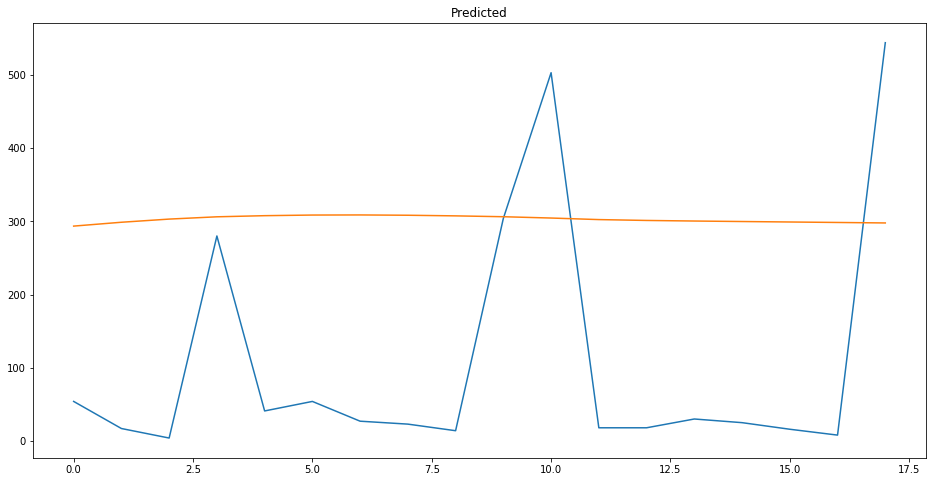

In [50]:
# visualise the price history
plt.figure(figsize=(16,8))
plt.title('Predicted')
plt.plot(y_test)
plt.plot(y_pred)
plt.show()